In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

# Create parameters

In [2]:
params = ob.mcf_params(num_vertices=100, num_edges=1000, M=10)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.mcf_agents(params)
g = ob.mcf_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [5]:
max_iter = 30
memory = [10, 20, max_iter]
memory_bounds = {}
for m in memory:
    prob.solve(rel_gap = 10**(-10), abs_gap = 10**(-10), max_iter=max_iter, memory=m)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=2373.389432875705, L=-20000.0, U=-8.42321808001702


/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=1, rel_gap=8.878326424998043, L=-83.20729774335342, U=-8.42321808001702
k=2, rel_gap=5.355342726976965, L=-78.57224250590679, U=-12.363179435215308
k=3, rel_gap=0.9948436485610586, L=-78.57224250591777, U=-39.387669586332905
k=4, rel_gap=0.48421498542335784, L=-78.57224250591821, U=-52.93858590405368
k=5, rel_gap=0.2952184683061493, L=-78.57224250593138, U=-60.66331235122518
k=6, rel_gap=0.20107022301415658, L=-78.57224250590339, U=-65.41852507900971
k=7, rel_gap=0.15102605896521334, L=-78.14204929273457, U=-67.8890357729913
k=8, rel_gap=0.10499123237646835, L=-77.54840436140302, U=-70.18010830241812
k=9, rel_gap=0.07352867734050164, L=-77.54840436138205, U=-72.23691923488809
k=10, rel_gap=0.055292406966823575, L=-77.54840436145673, U=-73.4852291644459
k=11, rel_gap=0.546468825147058, L=-115.17722405315463, U=-74.47755957330864
k=12, rel_gap=0.3036133365646283, L=-97.08993993455175, U=-74.47755957330864
k=13, rel_gap=0.1264280112256787, L=-83.89360931110406, U=-74.47755957330864
k=14

# Centralized solution

In [3]:
h_cvx = ob.cvx_multi_commodity_flow(params=params)[2]

# Plot

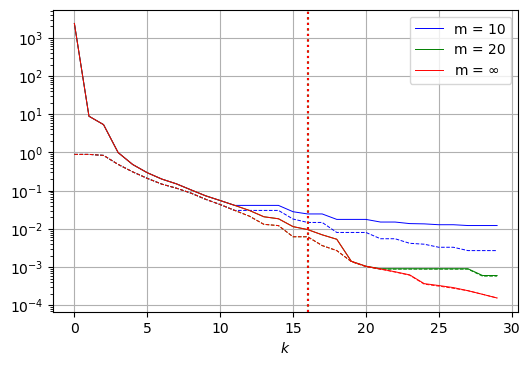

In [6]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx)